In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
from scipy.sparse import dok_matrix
import statsmodels.formula.api as smf
import statsmodels.api as sm 
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
from sklearn.linear_model import LinearRegression

df = pd.read_csv("/Users/cmdb/qbb2020answers2/week7/all_annotated.csv")
print(df)

            t_name gene_name    male_10    male_11    male_12    male_13  \
0      FBtr0114258   CR41571   0.000000   0.000000   0.000000   0.000000   
1      FBtr0346770   CG45784   0.000000   0.000000   0.000000   0.000000   
2      FBtr0302440   CR12798   0.000000   0.000000   0.000000   0.000000   
3      FBtr0302347   CR40182  23.712564  11.967821  20.767498  13.566818   
4      FBtr0346769   CG45783   0.000000   0.000000   0.000000   0.000000   
...            ...       ...        ...        ...        ...        ...   
34713  FBtr0114187   CR40502   0.000000   0.000000   0.000000   0.000000   
34714  FBtr0304147   CR40719   0.000000   0.000000   0.000000   0.000000   
34715  FBtr0114216   CR40679   2.011199   0.000000   7.994137   2.064200   
34716  FBtr0114222   CR40743   0.000000   0.000000   0.000000   0.000000   
34717  FBtr0114283   CR41619   0.000000   0.000000   0.000000   0.000000   

        male_14A   male_14B   male_14C   male_14D  female_10  female_11  \
0       0.00

In [2]:
import seaborn as sns

In [3]:
df["count"] = df.astype(bool).sum(axis=1) -2

df

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,count
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257,16
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591,14
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0


In [4]:
MedExp = pd.DataFrame(df[df["count"]>8].iloc[:,:-1])
MedExp



,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.202570
8,FBtr0113885,Parp,10.997173,0.000000,0.000000,0.000000,14.805335,0.000000,17.601667,10.729349,0.000000,0.000000,14.888651,14.518989,20.343670,4.087385,0.000000,25.284622
9,FBtr0301810,Alg-2,19.067924,0.000000,14.832370,27.793905,22.290230,7.846396,13.839143,12.905621,18.570707,2.919183,18.402807,26.431841,27.464781,7.432775,7.349162,22.792486
10,FBtr0113895,Tim17b,6.315716,3.935390,6.244336,69.942917,67.208557,7.605970,74.979057,53.740307,44.747662,16.834093,52.928318,77.950165,80.805580,31.863932,49.121342,77.608521
11,FBtr0345179,Tim17b,119.325905,11.631035,120.137291,75.778061,72.815582,123.849213,81.234352,59.657963,48.480839,18.238514,57.343983,86.686310,87.546967,34.522255,53.219402,84.936600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,FBtr0100879,mt:ND4,11.151757,0.391747,4.240487,93.574127,87.244370,22.549498,73.099991,56.537510,41.339439,0.285725,22.376423,93.960289,269.186951,22.976255,32.563301,218.131927
34663,FBtr0100884,mt:Cyt-b,33.341347,1.056151,9.832860,414.872559,102.529091,25.448748,71.750275,123.175087,119.770973,0.672975,48.309597,71.916695,237.404190,43.700970,75.445251,167.244049
34665,FBtr0100886,mt:ND1,25.209366,0.638430,21.281239,517.077271,326.313934,54.783924,360.265900,222.375244,306.410706,2.153615,200.718567,392.145020,433.656708,21.621773,91.902115,681.475891
34667,FBtr0100888,mt:lrRNA,2339.313232,34.080185,927.591858,4944.716797,2251.114990,593.744141,2493.088379,1651.994141,2578.825439,76.555481,2175.402344,3736.670654,122.910004,451.278412,692.211304,4556.642090


In [5]:
#For columns 2: -2, add 0.1 to the value and then take log2 of each
#This is the main datafram that we use moving forward
logged = MedExp.iloc[:,:2].join(np.log2(MedExp.iloc[:,2:]+0.1)) #.reset_index().iloc[1:,:]
logged



,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,FBtr0100879,mt:ND4,3.492078,-1.024012,2.117857,6.549579,6.448643,4.501407,6.193772,5.823686,5.372933,-1.374355,4.490341,6.555514,8.073001,4.528337,5.029599,7.769718
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787


In [6]:
cut_logged =logged.iloc[:,2:]
cut_logged


,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,3.492078,-1.024012,2.117857,6.549579,6.448643,4.501407,6.193772,5.823686,5.372933,-1.374355,4.490341,6.555514,8.073001,4.528337,5.029599,7.769718
34663,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787


In [7]:
#Create clusters of the genes 
genelinked = linkage(logged.iloc[:,2:])
genelinked




array([[1.25900000e+03, 1.26000000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.05000000e+03, 2.05100000e+03, 0.00000000e+00, 2.00000000e+00],
       [4.14800000e+03, 4.14900000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [4.69000000e+02, 1.63050000e+04, 1.30783559e+01, 8.15300000e+03],
       [4.68000000e+02, 1.63060000e+04, 1.32621231e+01, 8.15400000e+03],
       [2.56900000e+03, 1.63070000e+04, 1.46562268e+01, 8.15500000e+03]])

In [8]:
#transpose the data in order to cluster the samples
transpose = logged.transpose()
transposed = transpose.astype(object)
transposed



,3,8,9,10,11,12,13,16,37,41,...,34645,34646,34647,34649,34656,34658,34663,34665,34667,34715
t_name,FBtr0302347,FBtr0113885,FBtr0301810,FBtr0113895,FBtr0345179,FBtr0301812,FBtr0113990,FBtr0113989,FBtr0078964,FBtr0336702,...,FBtr0100866,FBtr0100867,FBtr0100868,FBtr0100870,FBtr0100877,FBtr0100879,FBtr0100884,FBtr0100886,FBtr0100888,FBtr0114216
gene_name,CR40182,Parp,Alg-2,Tim17b,Tim17b,CG41128,CG41099,CG41099,CG12582,CG12582,...,mt:ATPase8,mt:ATPase6,mt:CoIII,mt:ND3,mt:ND5,mt:ND4,mt:Cyt-b,mt:ND1,mt:lrRNA,CR40679
male_10,4.57365,3.47212,4.26062,2.68161,6.89997,2.70509,4.75646,3.14647,3.46393,2.26279,...,-3.32193,5.82113,6.40385,-3.32193,2.77647,3.49208,5.06356,4.6616,11.1919,1.07806
male_11,3.59309,-3.32193,-3.32193,2.01271,3.55226,-3.32193,-3.32193,-3.32193,4.23906,0.793853,...,-3.32193,1.28175,2.13634,-3.32193,-1.47013,-1.02401,0.20933,-0.437467,5.09509,-3.32193
male_12,4.38319,-3.32193,3.90037,2.66547,6.90974,3.38764,-3.32193,4.65375,4.67025,0.97646,...,-3.32193,4.05956,5.46229,-3.32193,3.67005,2.11786,3.31221,4.41827,9.8575,3.01688
male_13,3.77261,-3.32193,4.80188,6.13017,6.24561,4.52975,4.85263,4.09329,4.08372,0.791827,...,-0.664672,3.60902,10.2568,-3.32193,5.76376,6.54958,8.69687,9.01452,12.2717,1.11383
male_14A,4.24048,3.89776,4.4848,6.07272,6.18816,4.65837,4.89247,2.50752,4.07881,1.28855,...,1.52549,6.89477,7.99489,5.24796,5.72629,6.44864,6.6813,8.35056,11.1365,1.69674
male_14B,4.74968,-3.32193,2.9903,2.94598,6.95361,4.43548,-3.32193,-3.32193,-3.32193,-3.32193,...,0.489144,6.12108,6.91031,-3.32193,2.67673,4.50141,4.67518,5.77831,9.21394,-3.32193
male_14C,4.51853,4.14581,3.80107,6.23034,6.34579,5.11012,4.42178,-3.32193,3.48419,0.292786,...,0.705399,7.81442,8.48709,5.11985,5.72382,6.19377,6.16692,8.49332,11.2838,0.695194
male_14D,3.5586,3.43687,3.70106,5.75061,5.90106,4.14388,2.42338,3.73393,-3.32193,-3.32193,...,-3.32193,7.52131,7.18584,4.60372,3.96227,5.82369,6.94574,7.7975,10.6901,3.2158


In [9]:
#cluster the samples 
samplelinked = linkage(transposed.iloc[2:,:])

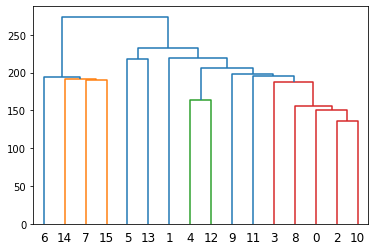

In [10]:
#Create dendrogram of the samples
dendro_samples = dendrogram(samplelinked)

#create dendrogram of the genes
#dendro_genes = dendrogram(genelinked) #jk, this is not possible because too many values

#save this into a file to submit to git

In [11]:
#Get the order of the dendrogram for the genes
bygene=leaves_list(genelinked)
bygene


array([2569,  468,  469, ..., 5392, 2395, 4081], dtype=int32)

In [12]:
#get the order of the dendrogram for the samples 
bysample=leaves_list(samplelinked)
bysample 

array([ 6, 14,  7, 15,  5, 13,  1,  4, 12,  9, 11,  3,  8,  0,  2, 10],
      dtype=int32)

In [13]:
#To-Do
#Create a dicitonary(?) that has the numbers listed 1-8155 with the leaves_list values 
#Re-index the dataframe by looking up the index number and then reordering it by the leaves_list value
#or 
#try reindex function??

#geneclustered = logged.set_index(pd.Index([bygene]))
#geneclustered = array[:, sample_order] #would first need to refer to the index list 

#new plan
#convert my leaves_list output to a list of strings 
#Use
#logged.reindex(new_index)
#and
#pandas.DataFrame.reindex(columns=column_names)


In [14]:
#bygene gives you the order of clustering by one value 
#by sample gives you the order of clustering by the other value 
print(bygene)
print(bysample)


[2569  468  469 ... 5392 2395 4081]
[ 6 14  7 15  5 13  1  4 12  9 11  3  8  0  2 10]


In [15]:
new_index = list()
for i in range(0,8155):
   new_index.append(i)

newer_index = np.array(new_index)



In [16]:
#Plan is to add a new index that just contains the order of the rows
#Then use the "reindex" to reset that index to the leaves list output

gene_index = bygene.tolist()
sample_index = bysample.tolist()
#logged.reindex(columns=sample_index)
cut_logged.set_index(newer_index)
cut_logged.reindex(gene_index)



,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
2569,5.206927,5.529902,1.505031,5.579322,5.899844,6.253538,2.833151,3.403912,5.203159,5.439067,5.407805,5.843629,5.856689,6.054996,6.239900,6.091854
468,2.511593,2.985043,3.191370,2.582402,4.470873,3.195518,-3.321928,3.475454,3.407067,4.673666,3.165305,3.865262,3.932786,2.407218,3.365580,1.200764
469,4.895329,5.484368,4.712538,4.334183,4.495335,4.747560,4.756992,5.241269,4.863711,5.270953,4.390251,4.863838,4.574072,5.066591,4.872169,4.826318
3560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#new attempt 
#make a dictionary for the rows that contains {row_position:number}
#reorder the rows by going through the leaves, then finding that value in the row_position and inserting
#that row in the new dataframe?

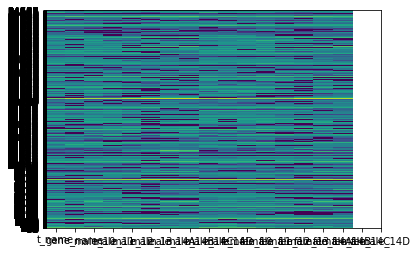

In [18]:
plt.pcolor(cut_logged)
plt.yticks(np.arange(0.5, len(logged.index), 1), logged.index)
plt.xticks(np.arange(0.5, len(logged.columns), 1), logged.columns)
plt.show()

In [19]:
#sns.heatmap(cut_logged)
sns.heatmap(df)

TypeError: '<=' not supported between instances of 'str' and 'int'

In [20]:
#Change this
logged_transpose = logged.transpose()
logged_transposed = logged_transpose.astype(object)
 
#Create new DF from old DF
df= cut_logged
logged_transposed = logged_transpose.astype(object)
 
    


In [21]:
df=cut_logged
print(df)

         male_10   male_11   male_12    male_13   male_14A  male_14B  \
3       4.573651  3.593093  4.383186   3.772605   4.240476  4.749679   
8       3.472120 -3.321928 -3.321928  -3.321928   3.897757 -3.321928   
9       4.260622 -3.321928  3.900371   4.801878   4.484797  2.990301   
10      2.681610  2.012708  2.665469   6.130167   6.072718  2.945977   
11      6.899972  3.552258  6.909741   6.245611   6.188155  6.953605   
...          ...       ...       ...        ...        ...       ...   
34658   3.492078 -1.024012  2.117857   6.549579   6.448643  4.501407   
34663   5.063561  0.209330  3.312209   8.696872   6.681296  4.675181   
34665   4.661599 -0.437467  4.418274   9.014515   8.350559  5.778312   
34667  11.191931  5.095088  9.857502  12.271701  11.136488  9.213941   
34715   1.078063 -3.321928  3.016877   1.113834   1.696735 -3.321928   

        male_14C   male_14D  female_10  female_11  female_12  female_13  \
3       4.518529   3.558602   4.459054   3.809626   4.051558

              6         14        7          15         5         13  \
3       4.573651  3.593093  4.383186   3.772605   4.240476  4.749679   
8       3.472120 -3.321928 -3.321928  -3.321928   3.897757 -3.321928   
9       4.260622 -3.321928  3.900371   4.801878   4.484797  2.990301   
10      2.681610  2.012708  2.665469   6.130167   6.072718  2.945977   
11      6.899972  3.552258  6.909741   6.245611   6.188155  6.953605   
...          ...       ...       ...        ...        ...       ...   
34658   3.492078 -1.024012  2.117857   6.549579   6.448643  4.501407   
34663   5.063561  0.209330  3.312209   8.696872   6.681296  4.675181   
34665   4.661599 -0.437467  4.418274   9.014515   8.350559  5.778312   
34667  11.191931  5.095088  9.857502  12.271701  11.136488  9.213941   
34715   1.078063 -3.321928  3.016877   1.113834   1.696735 -3.321928   

              1          4          12        9          11         3   \
3       4.518529   3.558602   4.459054  3.809626   4.051558  

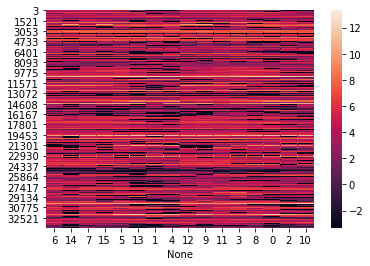

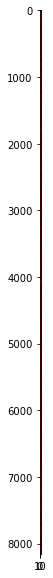

In [22]:

df=cut_logged #new df with cut_logged
#print 
#df.index=([bygene]) #Rearrange rows (aka genes) by  "bygene" index
df=df.transpose()
df.index=([bysample])
df=df.transpose()
print(df)
sns.heatmap(df)

plt.figure(figsize=(10,10))
plt.imshow(df,cmap='hot')
plt.show()

**create a dendrogram relating the sample to one another?
*Also, the data for the heat map still needs to be reorganized by the leaves_list categories

In [ ]:
male_10	male_11	male_12	male_13	male_14A	male_14B	male_14C	male_14D	female_10	female_11	female_12	female_13	female_14A	female_14B	female_14C	female_14D

#How would I combine male_14A and male_14B ??

In [28]:
# model = smf.ols(formula = "female_10 ~ female_11", data = cut_logged)
# results = model.fit()
# results.summary()
# This doesn't seem to work for more than one variable

NameError: name 'py' is not defined

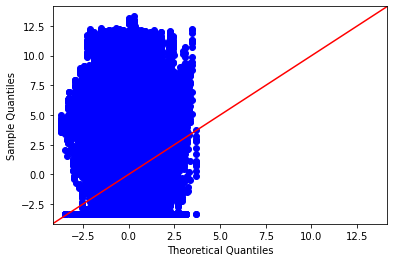

In [25]:
data_points = cut_logged     
  
sm.qqplot(data_points, line ='45') 
py.show() 
#Need to do the differential first